**What is Clustering ?**
Clustering is the process of diving the dataset into groups, consisting of similar data points

i) Points in the same group are as similar as possible
ii) Points in the different group are as disimilar as possible

**Examples of Clustering are :**

i) Group of diners in a restaurant
ii) Items are arranged in a mall

**Types of Clustering**

There  are 3 types of clustering :-
1) Exclusive Clustering:
- Data point/Item belongs to one cluster.
- It is known as Hard Clustering.
- For eg:- K-Means Clustering

2) Overlapping Clustering:
- Data point/Item belongs to multiple cluster.
- It is known as Soft Clustering.
- For eg:- Fuzzy / C-Means Clustering

3) Hierarchical Clustering
- In this clustering we developed the hierarchy of clusters in the form of a tree and the tree shaped structure is  known as the dendrogram.

- Sometime the results of k-means in clustering and hierarchical clustering may look similar but they both differ depending on how they work as there is no requirement to predetermine the number of clusters as we did in the K means algorithm.

**What is K-Means Clustering?**

K-Means is a clustering algorithm who's main goal is to group similar elements or data points into a cluster

" K " in K-Means Clustering represent the number of cluster.

**Algorithm:**
1) select the number of clusters to be identified eg:- select a value for k=3 in this case

2) Randomly select 3 distinct data point

3) Measure the distance between the 1st point and selected 3 clusters

4) Assign the 1st point to the nearest cluster

5) Calculate the cluster mean using the new data point

6) Repeat these steps again till all points get covered

**Import required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.cluster import KMeans

**Load the dataset using Pandas**

In [2]:
dataset = pd.read_csv('../input/mall-customers/Mall_Customers.csv')

In [3]:
dataset.head() # It will fetch the top 5 tuples from the dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**As i am working with K-Means Clustering so I need only Annual Income & Spending Money Attributes**

In [4]:
fields = dataset.iloc[:,[3,4]].values

In [5]:
print(fields)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choose Number of Clusters**

**Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.**

**In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.**

In [6]:
wcss = [] # empty list
for index in range(1,11): # range 1 to 10 implies that between this range any no. of clusters can be formed
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(fields)
    
    wcss.append(kmeans.inertia_)

**Let's plot the Elbow Method so that i can make out how many clusters will be formed **

Text(0, 0.5, 'WCSS')

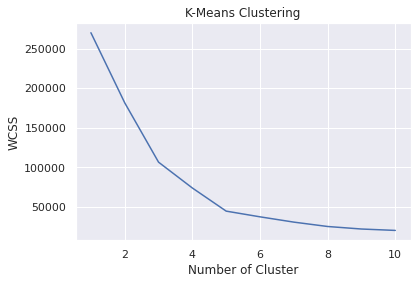

In [7]:
sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-Means Clustering")
mp.xlabel("Number of Cluster")
mp.ylabel("WCSS")


**After plotting the Elbow Method , i have make out that 5 clusters will be formed based on the provided datasets**

In [8]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=42)

cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


**Now, Let's Visualize all the clusters**

Text(0, 0.5, 'Spending Money')

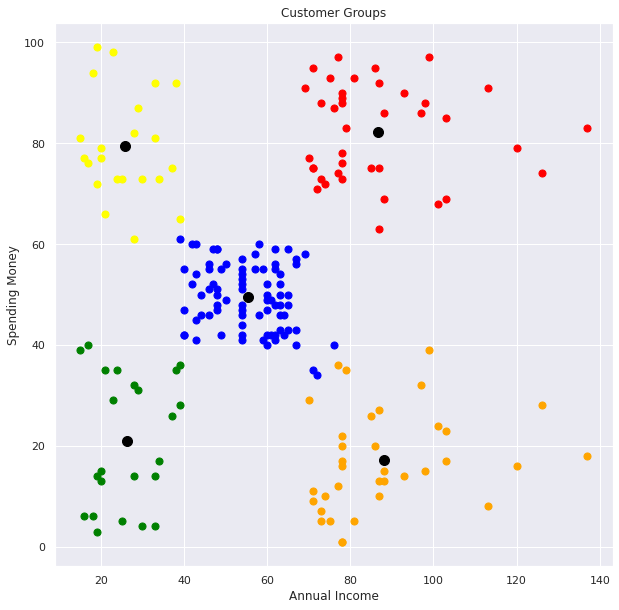

In [9]:
mp.figure(figsize=(10,10))
mp.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1], s=50, c='blue', label = "Cluster 1")
mp.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1], s=50, c='orange', label = "Cluster 1")
mp.scatter(fields[cluster_values==2,0], fields[cluster_values==2,1], s=50, c='green', label = "Cluster 1")
mp.scatter(fields[cluster_values==3,0], fields[cluster_values==3,1], s=50, c='yellow', label = "Cluster 1")
mp.scatter(fields[cluster_values==4,0], fields[cluster_values==4,1], s=50, c='red', label = "Cluster 1")

mp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c="black", label = "Centroids")

mp.title("Customer Groups")
mp.xlabel("Annual Income")
mp.ylabel("Spending Money")